## Uderstanding Global Honey Production
If you have downloaded and opened this Notebook then you are clearly familiar with Jupyter Notebooks and Pandas and may even be a bit a of a Pythonista. I'm not, but I've enjoyed learning how to use Jupyter Notebooks. The motivation for doing this project was innocent enough. I'm a hobbyist beekeeper and winter is a dull old time in the beekeeping world, so I thought it would be interesting to look at some of the freely available data relating to global honey production and sales. A dear friend of mine used to say (before he died) that 'you shouldn't confuse the issue with facts'. Sage advice - because the beekeeping world is awash with opinions that don't seem to be supported by any data. So I thought that publishing my analysis in a readable way in BBKA News might help remove some of the fog around perceptions 'like honey bees are being decimated' all around the world. More than that, I am concerned about the general gloom emanating from UK beekeepers. May be it's because we're mostly long in the tooth and a bit grumpy. Whatever, it seems to me that we are never going to improve UK apiculture if we keep telling oursielves 'the end is nigh'.
But I digress. I'll let the data do the talking, though no doubt there will be cynics that argue that garbage in means garbage out. Fair comment, but if you won't work with anything but perfect data (a fantasy) - how do you even begin to understand your world?
Hopefully there are no errors in the data processing and analysis that follows, but I'm painfully aware that my coding may be a little clunky - so any advice on more elegent script would be gratefully received, as would any comments on what was interesting, spurious, worthy of further investigation.

In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

import matplotlib
matplotlib.rcParams['axes.grid'] = True #Show gridlines by default
%matplotlib inline
from pandas import * #Import everything from the Pandas library

## Data Sources
The data used in this analysis were obtained the Food & Agriculture Organisation of the United Nations Statistics Database, FAOSTAT. This database provides free access to food and agriculture data for over 245 countries and territories from 1961 to the most recent year available. Data are provided by national governments or extrapolated by FAO staff. The data are then transformed into the United Nations Statistics Division standard format.<br>
The FAOSTAT website http://www.fao.org/faostat/en/#data was accessed and the following configurations selected:<br>
**Type of Product:** Lifestock, primary (for honey and wax) and Live Animals (for beehives) <br>
**Frequency:** Annual<br>
**Years:** 2011 to 2016<br>
**Countries:** All<br>
**Item: Honey:** Natural, Beeswax and Beehives<br>
**Elements:** Production quantity<br>

Data was downloaded as three separate csv files using the Download Data button and the download files renamed 'FAOSTAT_honey_2016.csv', 'FAOSTAT_wax_2016.csv' and 'FAOSTAT_hives_2016.csv'.

In [2]:
honey = read_csv('FAOSTAT_honey_2016.csv',skipinitialspace=True,dtype={'Area Code':str, 'Element Code':str,'Item Code':str,'Year':str,'Value':str})
honey.head(3)#View the downloaded data for honey

Domain Code             Domain Area Code         Area Element Code  \
0          QL  Livestock Primary         2  Afghanistan         5510   
1          QL  Livestock Primary         2  Afghanistan         5510   
2          QL  Livestock Primary         2  Afghanistan         5510   

      Element Item Code            Item  Year Code  Year    Unit Value Flag  \
0  Production      1182  Honey, natural       2011  2011  tonnes  2000  NaN   
1  Production      1182  Honey, natural       2012  2012  tonnes  2000  NaN   
2  Production      1182  Honey, natural       2013  2013  tonnes  2000  NaN   

  Flag Description  
0    Official data  
1    Official data  
2    Official data

In [3]:
wax = read_csv('FAOSTAT_wax_2016.csv',skipinitialspace=True,dtype={'Area Code':str, 'Element Code':str,'Item Code':str,'Year':str,'Value':str})
wax.iloc[301:305]#View a slice of the downloaded data for beeswax

Domain Code             Domain Area Code    Area Element Code     Element  \
301          QL  Livestock Primary       226  Uganda         5510  Production   
302          QL  Livestock Primary       226  Uganda         5510  Production   
303          QL  Livestock Primary       226  Uganda         5510  Production   
304          QL  Livestock Primary       226  Uganda         5510  Production   

    Item Code     Item  Year Code  Year    Unit Value Flag  \
301      1183  Beeswax       2012  2012  tonnes  1330   Im   
302      1183  Beeswax       2013  2013  tonnes  1284   Im   
303      1183  Beeswax       2014  2014  tonnes  1290   Im   
304      1183  Beeswax       2015  2015  tonnes  1299   Im   

                             Flag Description  
301  FAO data based on imputation methodology  
302  FAO data based on imputation methodology  
303  FAO data based on imputation methodology  
304  FAO data based on imputation methodology

In [4]:
hives = read_csv('FAOSTAT_hives_2016.csv',skipinitialspace=True,dtype={'Area Code':str, 'Element Code':str,'Item Code':str,'Year':str,'Value':str})
hives.head(3)#View the downloaded data for beehives

Domain Code        Domain Area Code     Area Element Code Element Item Code  \
0          QA  Live Animals         3  Albania         5114  Stocks      1181   
1          QA  Live Animals         3  Albania         5114  Stocks      1181   
2          QA  Live Animals         3  Albania         5114  Stocks      1181   

       Item  Year Code  Year Unit   Value Flag Flag Description  
0  Beehives       2011  2011   No  233000  NaN    Official data  
1  Beehives       2012  2012   No  239081  NaN    Official data  
2  Beehives       2013  2013   No  246151  NaN    Official data

## Data Preparation
Several of the columns in the tables above are not required for further analyis so were removed, leaving just three columns in each table.

In [5]:
COLUMNS = ['Area', 'Year','Value']#Select the columns required
honeyA = honey[COLUMNS]
honeyB = honeyA.rename(columns={'Area':'Country', 'Value':'Honey(ton)'})#Rename columns
hivesA = hives[COLUMNS]
hivesB = hivesA.rename(columns={'Area':'Country', 'Value':'No. Hives'})#Rename columns
waxA = wax[COLUMNS]
waxB = waxA.rename(columns={'Area':'Country', 'Value':'Wax(ton)'})#Rename columns
hivesB.iloc[24:30]#Show a slice of the new dataframe

Country  Year No. Hives
24  Armenia  2011    203647
25  Armenia  2012    209800
26  Armenia  2013    222189
27  Armenia  2014    241416
28  Armenia  2015    235214
29  Armenia  2016    245396

### Merging Tables
The three data sets were then merged to create a single table containing values for honey, beeswax and number of hives.

In [6]:
honeyB['Country_Year']=honeyB['Country']+honeyB['Year']#Creating a common key for merging
waxB['Country_Year']=waxB['Country']+waxB['Year']#Creating a common key for merging
hivesB['Country_Year']=hivesB['Country']+hivesB['Year']#Creating a common key for merging
combine_honey_wax=merge(honeyB,waxB, on='Country_Year', how='left')#Combining the honey and wax tables
combine_all=merge(combine_honey_wax,hivesB, on='Country_Year',how='left')#Combining the hives table
headings=['Country_x','Year_x','Honey(ton)','Wax(ton)','No. Hives']#Remove unwanted columns
combine_all=combine_all[headings]
combine_all['Country']=combine_all['Country_x']#Rename column
combine_all['Year']=combine_all['Year_x']#Rename column
newheadings=['Country','Year','Honey(ton)','Wax(ton)','No. Hives']
combine_all=combine_all[newheadings].fillna('-1')#
combine_all.iloc[235:240]#View a slice of the new table

Country  Year Honey(ton) Wax(ton) No. Hives
235  Ethiopia  2012      45905     5000   5207300
236  Ethiopia  2013          0     5000   5124228
237  Ethiopia  2014          0     5310   5885263
238  Ethiopia  2015      59161     5523   5916100
239  Ethiopia  2016      47706     5542   6189329

### Data Inspection
The data table above was examined to determine the amount of data, it's format and the number of 'NaN' (Not a Number) occurences arising as a result of merging the tables.

In [7]:
print('Number of rows, columns',combine_all.shape)
print(combine_all.dtypes)

Number of rows, columns (853, 5)
Country       object
Year          object
Honey(ton)    object
Wax(ton)      object
No. Hives     object
dtype: object


There are 853 rows of data arranged in 5 columns. All data are stored as an object (string). There are some missing values within the tables which have arisen because a country failed to report data to the FAO. These are shown in the data table as ',M" ', as the entries for Argentina show below:  

In [8]:
combine_all[combine_all['Country']=='Argentina']

Country  Year Honey(ton) Wax(ton) No. Hives
24  Argentina  2011      72000     4700   2970000
25  Argentina  2012      76000     4700   2970000
26  Argentina  2013      67500     4794   3000000
27  Argentina  2014        ,M"     4897   2980000
28  Argentina  2015      58234     4863   2958625
29  Argentina  2016      51363     4880   3014159

It's important to know how many missing values are in each column as this may significantly impact any data analysis. 

In [9]:
print ('No. missing values in Honey column =',combine_all['Honey(ton)'].value_counts()[',M"'])
print ('No. missing values in Wax column =',combine_all['Wax(ton)'].value_counts()[',M"'])
print ('No. missing values in Hives column =',combine_all['No. Hives'].value_counts()[',M"'])

No. missing values in Honey column = 48
No. missing values in Wax column = 9
No. missing values in Hives column = 14


There are also zero values in the table. These may arise because because production was indeed zero, or may be erroneously recorded as zero when a country failed to report. It's therefore important to check the number of zero entries. 

In [10]:
print ('No. zero values in Honey column =',combine_all['Honey(ton)'].value_counts()['0'])
print ('No. zero values in Wax column =',combine_all['Wax(ton)'].value_counts()['0'])
print ('No. zero values in Hives column =',combine_all['No. Hives'].value_counts()['0'])

No. zero values in Honey column = 2
No. zero values in Wax column = 2
No. zero values in Hives column = 2


### Treatment of missing and zero values
There are various techniques for managing missing values. For the purposes of this analyis the missing values were simply imputed by carrying the last available value forward. This risks overstating production if there is a clear downward tend, and understates production if there is an upward trend. Inspecting the list of imputed values can help assess this risk. Imputed values for honey production were examined first:   

In [11]:
for i in range(1,853):
    if combine_all.loc[i,'Year']!='2011':#last value carried forward can only apply from 2012 onwards
        last=combine_all['Honey(ton)'].get_value(i-1,)#This obtains the last value
        if combine_all['Honey(ton)'].iloc[i]== ',M"':#This tests whether there is a missing value which needs to be replaced with the last value
            combine_all.loc[i,'Honey(ton)'] = last
            if combine_all.loc[i,'Honey(ton)']==',M"':#This tests whether what was carried forward was not a number...
                combine_all.loc[i,'Honey(ton)']='-1'#...and replaces it with 'NaN'
            print(i,combine_all['Country'].iloc[i],combine_all['Year'].iloc[i],combine_all['Honey(ton)'].iloc[i])        
    

27 Argentina 2014 67500
62 Belgium 2013 2650
63 Belgium 2014 2650
64 Belgium 2015 2650
65 Belgium 2016 2650
104 Cameroon 2013 4300
105 Cameroon 2014 4300
106 Cameroon 2015 4300
107 Cameroon 2016 4300
212 Ecuador 2013 856
213 Ecuador 2014 856
214 Ecuador 2015 856
215 Ecuador 2016 856
283 Greenland 2012 -1
284 Greenland 2013 -1
285 Greenland 2014 -1
421 Lebanon 2014 1620
422 Lebanon 2015 1620
423 Lebanon 2016 1620
426 Libya 2013 815
427 Libya 2014 815
428 Libya 2015 815
429 Libya 2016 815
431 Liechtenstein 2012 -1
432 Liechtenstein 2013 -1
433 Liechtenstein 2014 -1
501 Netherlands 2012 -1
502 Netherlands 2013 -1
503 Netherlands 2014 -1
504 Netherlands 2015 -1
505 Netherlands 2016 -1
621 Rwanda 2012 50
622 Rwanda 2013 50
623 Rwanda 2014 50
624 Rwanda 2015 50
625 Rwanda 2016 50
674 South Sudan 2012 1089
675 South Sudan 2013 1089
676 South Sudan 2014 1089
677 South Sudan 2015 1089
678 South Sudan 2016 1089
777 Uganda 2013 712
778 Uganda 2014 712
779 Uganda 2015 712
780 Uganda 2016 712


The listing above shows that just twelve countries account for most of the unreported honey data. There are no honey data whatsoever for the Netherlands, Greenland or Liechtenstein. Data has been being carried forward for up to 5 years (i.e. Is imputed from just one reported value in 2011) in the case of South Sudan and Rwanda. The imputed values are small, with the exception of Argentina, where only one value has been imputed.
The same exercise needs to be completed with the Wax and Hive columns.

In [12]:
for i in range(1,853):
    if combine_all.loc[i,'Year']!='2011':#last value carried forward can only apply from 2012 onwards
        last=combine_all['Wax(ton)'].get_value(i-1,)#This obtains the last value
        if combine_all['Wax(ton)'].iloc[i]== ',M"':#This tests whether there is a missing value which needs to be replaced with the last value
            combine_all.loc[i,'Wax(ton)'] = last
            if combine_all.loc[i,'Wax(ton)']==',M"':#This tests whether what was carried forward was not a number...
                combine_all.loc[i,'Wax(ton)']='-1'#...and replaces it with 'NaN'
            print(i,combine_all['Country'].iloc[i],combine_all['Year'].iloc[i],last,combine_all['Wax(ton)'].iloc[i])

525 Niue 2012 ,M" -1
526 Niue 2013 -1 -1
527 Niue 2014 -1 -1
674 South Sudan 2012 -1 -1
675 South Sudan 2013 -1 -1
676 South Sudan 2014 -1 -1
677 South Sudan 2015 -1 -1
678 South Sudan 2016 -1 -1


In [13]:
for i in range(1,853):
    if combine_all.loc[i,'Year']!='2011':#last value carried forward can only apply from 2012 onwards
        last=combine_all['No. Hives'].get_value(i-1,)#This obtains the last value
        if combine_all['No. Hives'].iloc[i]== ',M"':#This tests whether there is a missing value which needs to be replaced with the last value
            combine_all.loc[i,'No. Hives'] = last
            if combine_all.loc[i,'No. Hives']==',M"':#This tests whether what was carried forward was not a number...
                combine_all.loc[i,'No. Hives']='-1'#...and replaces it with 'NaN'
            print(i,combine_all['Country'].iloc[i],combine_all['Year'].iloc[i],last,combine_all['No. Hives'].iloc[i])

73 Bolivia (Plurinational State of) 2012 ,M" -1
74 Bolivia (Plurinational State of) 2013 -1 -1
75 Bolivia (Plurinational State of) 2014 -1 -1
501 Netherlands 2012 ,M" -1
502 Netherlands 2013 -1 -1
503 Netherlands 2014 -1 -1
504 Netherlands 2015 -1 -1
505 Netherlands 2016 -1 -1
788 United Kingdom 2012 ,M" -1
789 United Kingdom 2013 -1 -1
790 United Kingdom 2014 -1 -1


For zero values it is important to determine whether the zero is due to the data not being reported, or because production actually was zero. The zero value entries therefore need to be inspected.

In [14]:
print (combine_all[combine_all['Honey(ton)']=='0'])
print (combine_all[combine_all['Wax(ton)']=='0'])
print (combine_all[combine_all['No. Hives']=='0'])

      Country  Year Honey(ton) Wax(ton) No. Hives
236  Ethiopia  2013          0     5000   5124228
237  Ethiopia  2014          0     5310   5885263
    Country  Year Honey(ton) Wax(ton) No. Hives
528    Niue  2015          7        0       817
529    Niue  2016          7        0       817
                             Country  Year Honey(ton) Wax(ton) No. Hives
76  Bolivia (Plurinational State of)  2015        704       -1         0
77  Bolivia (Plurinational State of)  2016        711       -1         0


The entire data set for these countries needs to be inspected to see if imputing a value is justifiable.

In [15]:
print (combine_all[combine_all['Country']=='Ethiopia'])
print (combine_all[combine_all['Country']=='Niue'])
print (combine_all[combine_all['Country']=='Bolivia (Plurinational State of)'])

      Country  Year Honey(ton) Wax(ton) No. Hives
234  Ethiopia  2011      39892     5000   4993815
235  Ethiopia  2012      45905     5000   5207300
236  Ethiopia  2013          0     5000   5124228
237  Ethiopia  2014          0     5310   5885263
238  Ethiopia  2015      59161     5523   5916100
239  Ethiopia  2016      47706     5542   6189329
    Country  Year Honey(ton) Wax(ton) No. Hives
524    Niue  2011          7      ,M"       815
525    Niue  2012          7       -1       816
526    Niue  2013          7       -1       816
527    Niue  2014          7       -1       816
528    Niue  2015          7        0       817
529    Niue  2016          7        0       817
                             Country  Year Honey(ton) Wax(ton) No. Hives
72  Bolivia (Plurinational State of)  2011        643       -1       ,M"
73  Bolivia (Plurinational State of)  2012        658       -1        -1
74  Bolivia (Plurinational State of)  2013        672       -1        -1
75  Bolivia (Plurinati

For Ethiopia honey production was reported for two years either side of the zero values, and wax and hives production were recorded. Moreover, bees don't switch off honey production so it is reasonable to impute values for 2013 and 2014 by carrying forward the 2012 value, even though this is probably an underestimate given the rising trend.
For Niue there is no record of wax production so imputing a value is not appropriate. Similarly Bolivia has never reported the number of hives so imputing a value is not possible.

In [16]:
for i in range(1,853):
    if combine_all.loc[i,'Year']!='2011':#last value carried forward can only apply from 2012 onwards
        last=combine_all['Honey(ton)'].get_value(i-1,)#This obtains the last value for honey
        if combine_all['Honey(ton)'].iloc[i]== '0':#This removes the zero value for honey and imputes the last value
            combine_all.loc[i,'Honey(ton)'] = last
        if combine_all['Wax(ton)'].iloc[i]=='0':#Removes the zero value for Niue
            combine_all.loc[i,'Wax(ton)'] = '-1'
        if combine_all['No. Hives'].iloc[i] =='0':#Removes the zero value for Bolivia
            combine_all.loc[i,'No. Hives'] = '-1'

The intention of this analysis is to look at the last five years data so the data for 2011 can now be discarded. The values need to be converted from string objects to integers to allow mathmatical manipulation, and the nonsense 'values' of -1 introduced earlier to allow conversion of strings to integers now need to be replaced with No available Number 'NaN'.  

In [17]:
five_year = combine_all.loc[combine_all.Year != '2011']#Remove 2011 data
five_year=five_year.astype({'Honey(ton)':int,'Wax(ton)':int,'No. Hives':int})#Convert values to integers
five_year=five_year.replace(-1, np.nan)#Replaces nonsense -1 values created earlier to NaN - Number available Number
five_year.head()

Country  Year  Honey(ton)  Wax(ton)  No. Hives
1  Afghanistan  2012      2000.0       NaN        NaN
2  Afghanistan  2013      2000.0       NaN        NaN
3  Afghanistan  2014      1808.0       NaN        NaN
4  Afghanistan  2015      1708.0       NaN        NaN
5  Afghanistan  2016      1602.0       NaN        NaN

### Removing Duplicate Data
For political reasons FAO data sets typically contain aggregate data for 'China' as well as China, mainland and Taiwan as you can see in the table below. This duplication needs to be corrected before data annalysis can proceed.

In [18]:
five_year_grouped=five_year.groupby('Country').aggregate(sum)#Create 5 year totals for each country
five_year_grouped.sort_values('Honey(ton)', ascending=False).head(30)

Honey(ton)  Wax(ton)   No. Hives
Country                                                      
China                         2389760.0       NaN  45362095.0
China, mainland               2328167.0       NaN  44747028.0
Turkey                         500578.0   21182.0  36113589.0
Iran (Islamic Republic of)     383014.0       NaN  33724018.0
United States of America       357653.0    8060.0  13354000.0
Russian Federation             345712.0       NaN  16807734.0
Ukraine                        333277.0       NaN     14000.0
Argentina                      320597.0   24134.0  14922784.0
India                          304455.0  116500.0  59368079.0
Mexico                         293372.0    9023.0   9688437.0
Ethiopia                       244582.0   26375.0  28322220.0
Canada                         198961.0       NaN   3438848.0
Brazil                         185226.0    8507.0   4887202.0
Spain                          159989.0    8047.0  12969830.0
United Republic of Tanzania    150068.0    9287.0  14506192.0
Republic of Korea              117918.0   17220.0   8927149.0
Hungary                        117460.0       NaN   3697000.0
Romania                        116875.0       NaN   6646711.0
Angola                         116661.0   11534.0   5759374.0
Kenya                          109975.0   12510.0   7977455.0
Germany                        102016.0       NaN   3663769.0
Uruguay                         98506.0    5403.0   2759729.0
Greece                          87128.0    2132.0   7384870.0
New Zealand                     85411.0    1373.0   2670970.0
Central African Republic        82172.0    3980.0   7940736.0
Poland                          78372.0       NaN   7603960.0
Viet Nam                        71474.0       NaN   1280804.0
Australia                       66421.0    1438.0   2097476.0
France                          62737.0    2151.0   3977511.0
China, Taiwan Province of       61594.0       NaN    615067.0

China is the largest producer of honey (almost 2.4 million tons over the five year period) but it is apparant that there are three entries for China; one for all China including Taiwan, one for 'China mainland' and a separate data set for 'China, Taiwan Province of'. For this analysis the aggregate figures for 'China' will be removed, and China (mainland) and Taiwan will be shown separately.

In [19]:
five_year= five_year[five_year.Country != 'China']
def changeNames(name):
    if name=='China, Taiwan Province of':
        name='Taiwan'
    if name =='China, mainland':
        name='China'
    return name
five_year['Country']=five_year['Country'].apply(changeNames)
five_year_grouped=five_year.groupby('Country').aggregate(sum)
five_year_grouped.sort_values('Honey(ton)', ascending=False).head(30)

Honey(ton)  Wax(ton)   No. Hives
Country                                                      
China                         2328167.0       NaN  44747028.0
Turkey                         500578.0   21182.0  36113589.0
Iran (Islamic Republic of)     383014.0       NaN  33724018.0
United States of America       357653.0    8060.0  13354000.0
Russian Federation             345712.0       NaN  16807734.0
Ukraine                        333277.0       NaN     14000.0
Argentina                      320597.0   24134.0  14922784.0
India                          304455.0  116500.0  59368079.0
Mexico                         293372.0    9023.0   9688437.0
Ethiopia                       244582.0   26375.0  28322220.0
Canada                         198961.0       NaN   3438848.0
Brazil                         185226.0    8507.0   4887202.0
Spain                          159989.0    8047.0  12969830.0
United Republic of Tanzania    150068.0    9287.0  14506192.0
Republic of Korea              117918.0   17220.0   8927149.0
Hungary                        117460.0       NaN   3697000.0
Romania                        116875.0       NaN   6646711.0
Angola                         116661.0   11534.0   5759374.0
Kenya                          109975.0   12510.0   7977455.0
Germany                        102016.0       NaN   3663769.0
Uruguay                         98506.0    5403.0   2759729.0
Greece                          87128.0    2132.0   7384870.0
New Zealand                     85411.0    1373.0   2670970.0
Central African Republic        82172.0    3980.0   7940736.0
Poland                          78372.0       NaN   7603960.0
Viet Nam                        71474.0       NaN   1280804.0
Australia                       66421.0    1438.0   2097476.0
France                          62737.0    2151.0   3977511.0
Taiwan                          61594.0       NaN    615067.0
Chile                           56345.0    3067.0   2142342.0

## Data analysis
Now the data sets have been cleaned up and properly formated they are ready for data analysis.  

In [20]:
Five_YR_Honey=five_year_grouped['Honey(ton)'].sum()#Calculate total production of honey over the five year period
Five_YR_Wax=five_year_grouped['Wax(ton)'].sum()
print ('Global honey production over last five years(tons) = ',Five_YR_Honey)
print ('Global wax production over last five years(tons) = ',Five_YR_Wax)

Global honey production over last five years(tons) =  8738664.0
Global wax production over last five years(tons) =  328621.0


Global production of honey was over 8.7 million tons over the five year period 2012-2016. During the same period 328,000 ton of wax production were reported. The percentage contributions of the top 10 largest honey producers are as follows:

In [21]:
five_year_grouped['Percent']=((five_year_grouped['Honey(ton)'].divide(Five_YR_Honey))*100).round(1)
five_year_grouped.sort_values('Percent',ascending=False).head(10)

Honey(ton)  Wax(ton)   No. Hives  Percent
Country                                                              
China                        2328167.0       NaN  44747028.0     26.6
Turkey                        500578.0   21182.0  36113589.0      5.7
Iran (Islamic Republic of)    383014.0       NaN  33724018.0      4.4
United States of America      357653.0    8060.0  13354000.0      4.1
Russian Federation            345712.0       NaN  16807734.0      4.0
Ukraine                       333277.0       NaN     14000.0      3.8
Argentina                     320597.0   24134.0  14922784.0      3.7
India                         304455.0  116500.0  59368079.0      3.5
Mexico                        293372.0    9023.0   9688437.0      3.4
Ethiopia                      244582.0   26375.0  28322220.0      2.8

China dominates and accounts for almost 27% of global production. The rest of the global market is quite fragmented. The top ten producers account for the following percentage of global production:

In [22]:
top_ten=five_year_grouped.sort_values('Percent',ascending=False).head(10)
top_ten['Cum']=top_ten['Percent'].cumsum()#Cummulate the percentage of total production
top_ten

Honey(ton)  Wax(ton)   No. Hives  Percent   Cum
Country                                                                    
China                        2328167.0       NaN  44747028.0     26.6  26.6
Turkey                        500578.0   21182.0  36113589.0      5.7  32.3
Iran (Islamic Republic of)    383014.0       NaN  33724018.0      4.4  36.7
United States of America      357653.0    8060.0  13354000.0      4.1  40.8
Russian Federation            345712.0       NaN  16807734.0      4.0  44.8
Ukraine                       333277.0       NaN     14000.0      3.8  48.6
Argentina                     320597.0   24134.0  14922784.0      3.7  52.3
India                         304455.0  116500.0  59368079.0      3.5  55.8
Mexico                        293372.0    9023.0   9688437.0      3.4  59.2
Ethiopia                      244582.0   26375.0  28322220.0      2.8  62.0

The top ten countries account for around 62% of world honey production. The trend in honey production over the five year period can be analysed by country and in total.

In [23]:
honey_time=pivot_table(five_year,
           index=['Country'],
            columns=['Year'],
           values='Honey(ton)',
           aggfunc=sum,
           margins=True)
honey_time.sort_values('All',ascending=False).head(10)

Year                             2012       2013       2014       2015  \
Country                                                                  
All                         1650871.0  1693248.0  1757609.0  1837845.0   
China                        448000.0   450300.0   462028.0   477000.0   
Turkey                        89162.0    94694.0   103525.0   107665.0   
Iran (Islamic Republic of)    71100.0    74600.0    77800.0    78955.0   
United States of America      64544.0    67812.0    80862.0    71007.0   
Russian Federation            64898.0    68446.0    74868.0    67736.0   
Ukraine                       70134.0    73713.0    66521.0    63615.0   
Argentina                     76000.0    67500.0    67500.0    58234.0   
India                         60000.0    61000.0    61046.0    61074.0   
Mexico                        58602.0    56907.0    60624.0    61881.0   

Year                             2016        All  
Country                                           
All                         1799091.0  8738664.0  
China                        490839.0  2328167.0  
Turkey                       105532.0   500578.0  
Iran (Islamic Republic of)    80559.0   383014.0  
United States of America      73428.0   357653.0  
Russian Federation            69764.0   345712.0  
Ukraine                       59294.0   333277.0  
Argentina                     51363.0   320597.0  
India                         61335.0   304455.0  
Mexico                        55358.0   293372.0

The same can be done for wax production.

In [24]:
wax_time=pivot_table(five_year,
           index=['Country'],
            columns=['Year'],
           values='Wax(ton)',
           aggfunc=sum,
           margins=True)
wax_time.sort_values('All',ascending=False).head(10)

Year                            2012     2013     2014     2015     2016  \
Country                                                                    
All                          64483.0  65026.0  66387.0  66102.0  66623.0   
India                        23100.0  23200.0  23300.0  23400.0  23500.0   
Ethiopia                      5000.0   5000.0   5310.0   5523.0   5542.0   
Argentina                     4700.0   4794.0   4897.0   4863.0   4880.0   
Turkey                        4222.0   4241.0   4053.0   4266.0   4400.0   
Republic of Korea             3063.0   3063.0   4018.0   3620.0   3456.0   
Kenya                         2500.0   2500.0   2500.0   2506.0   2504.0   
Angola                        2300.0   2300.0   2303.0   2318.0   2313.0   
United Republic of Tanzania   1850.0   1870.0   1881.0   1844.0   1842.0   
Mexico                        1868.0   2010.0   1862.0   1439.0   1844.0   

Year                              All  
Country                                
All                          328621.0  
India                        116500.0  
Ethiopia                      26375.0  
Argentina                     24134.0  
Turkey                        21182.0  
Republic of Korea             17220.0  
Kenya                         12510.0  
Angola                        11534.0  
United Republic of Tanzania    9287.0  
Mexico                         9023.0

And the number of hives.

In [25]:
hive_time=pivot_table(five_year,
           index=['Country'],
            columns=['Year'],
           values='No. Hives',
           aggfunc=sum,
           margins=True)
hive_time.sort_values('All',ascending=False).head(10)

Year                               2012        2013        2014        2015  \
Country                                                                       
All                          83059260.0  84899038.0  87262892.0  89010874.0   
India                        11550000.0  11600000.0  11800000.0  11949198.0   
China                         8870000.0   8900000.0   8950000.0   9001401.0   
Turkey                        6348009.0   6641348.0   7082732.0   7709636.0   
Iran (Islamic Republic of)    5613259.0   6644114.0   6996366.0   7408275.0   
Ethiopia                      5207300.0   5124228.0   5885263.0   5916100.0   
Russian Federation            3250096.0   3284176.0   3341454.0   3474014.0   
Argentina                     2970000.0   3000000.0   2980000.0   2958625.0   
United Republic of Tanzania   2820000.0   2850000.0   2900000.0   2941633.0   
United States of America      2539000.0   2640000.0   2740000.0   2660000.0   

Year                               2016          All  
Country                                               
All                          90563607.0  434795671.0  
India                        12468881.0   59368079.0  
China                         9025627.0   44747028.0  
Turkey                        8331864.0   36113589.0  
Iran (Islamic Republic of)    7062004.0   33724018.0  
Ethiopia                      6189329.0   28322220.0  
Russian Federation            3457994.0   16807734.0  
Argentina                     3014159.0   14922784.0  
United Republic of Tanzania   2994559.0   14506192.0  
United States of America      2775000.0   13354000.0

Global honey production has risen from 1.65 million tons in 2012 to a peak of almost 1.84 million tons in 2015, before falling back a bit it 2016. Some countries are increasing production whereas others are decreasing. This can be examined further by taking the first 2 years of the period ('Early') and comparing it with the last 2 years ('Late'). The reason for taking 2 years is to try and average out any fluctuations due to external factors like weather:

In [26]:
honey_time['Early']=honey_time['2012']+honey_time['2013']
honey_time['Late']=honey_time['2015']+honey_time['2016']
honey_time['Difference']=honey_time['Late']-honey_time['Early']
honey_time['Change']=honey_time['Late']/honey_time['Early']
honey_time.sort_values('Difference').tail(10)

Year                2012       2013       2014       2015       2016  \
Country                                                                
Ethiopia         45905.0    45905.0    45905.0    59161.0    47706.0   
Mali               190.0     1441.0     3744.0     7109.0    10739.0   
Hungary          17500.0    18500.0    24400.0    30700.0    26360.0   
Turkey           89162.0    94694.0   103525.0   107665.0   105532.0   
Kenya            11650.0     8250.0    29742.0    34759.0    25574.0   
China           448000.0   450300.0   462028.0   477000.0   490839.0   
All            1650871.0  1693248.0  1757609.0  1837845.0  1799091.0   
Greenland            NaN        NaN        NaN        NaN        NaN   
Liechtenstein        NaN        NaN        NaN        NaN        NaN   
Netherlands          NaN        NaN        NaN        NaN        NaN   

Year                 All      Early       Late  Difference     Change  
Country                                                                
Ethiopia        244582.0    91810.0   106867.0     15057.0   1.164002  
Mali             23223.0     1631.0    17848.0     16217.0  10.942980  
Hungary         117460.0    36000.0    57060.0     21060.0   1.585000  
Turkey          500578.0   183856.0   213197.0     29341.0   1.159587  
Kenya           109975.0    19900.0    60333.0     40433.0   3.031809  
China          2328167.0   898300.0   967839.0     69539.0   1.077412  
All            8738664.0  3344119.0  3636936.0    292817.0   1.087562  
Greenland            NaN        NaN        NaN         NaN        NaN  
Liechtenstein        NaN        NaN        NaN         NaN        NaN  
Netherlands          NaN        NaN        NaN         NaN        NaN

China continues to show strong growth(7.7%) from a large base, and was the biggest contributer to growth (almost 70,000 ton increase in the last two year period compared to the 2012/13 period). Kenya, Turkey and Hungary all showed good growth.

It is self-evident that that large countries will produce more honey than small countries. However it would be interesting to look at honey production compared to land area, in order to obtain an indication of productivity.
Land area data was obtained from the World Bank web site https://data.worldbank.org/indicator/AG.LND.TOTL.K2 and downloaded as a csv file. Data for all time periods other than 2016 were deleted and the file saved as 'Landarea2016.csv'. The World Bank define 'Land area' as 'a country's total area, excluding area under inland water bodies, national claims to continental shelf, and exclusive economic zones. In most cases the definition of inland water bodies includes major rivers and lakes.'
For political reasons the World bank does not contain data for Taiwan, so this was obtained from Wikipedia and added to the csv file. Data were also missing for South Sudan so this was also added.

In [27]:
landarea=read_csv('Landarea2016.csv',skipinitialspace=True)
landarea=landarea.dropna()#Removes rows without data
landarea.head()

Data Source World Development Indicators          Unnamed: 2  \
3  Country Name                 Country Code      Indicator Name   
4         Aruba                          ABW  Land area (sq. km)   
5   Afghanistan                          AFG  Land area (sq. km)   
6        Angola                          AGO  Land area (sq. km)   
7       Albania                          ALB  Land area (sq. km)   

       Unnamed: 3  Unnamed: 4  
3  Indicator Code      2016.0  
4  AG.LND.TOTL.K2       180.0  
5  AG.LND.TOTL.K2    652860.0  
6  AG.LND.TOTL.K2   1246700.0  
7  AG.LND.TOTL.K2     27400.0

The World Bank uses different names for some of the Countries so these had to be changed to the same format as used by the FAO, to allow merger of data on 'Country'.

In [28]:
COLUMNS2 = ['Data Source', 'Unnamed: 4']#Remove unwanted columns
landarea=landarea[COLUMNS2]
landarea = landarea.rename(columns={'Data Source':'Country','Unnamed: 4':'Land area (sq. km)'})#Rename columns
def changeName(name):#Change names of certain countries to match those of preceding tables
    if name=='Iran, Islamic Rep.':
        return'Iran (Islamic Republic of)'
    elif name=='United States':
        return'United States of America'
    elif name =='Korea, Rep.':
        return'Republic of Korea'
    elif name=='Tanzania':
        return'United Republic of Tanzania'
    elif name=='Vietnam':
        return'Viet Nam'
    elif name=='Czech Republic':
        return'Czechia'
    elif name=='Egypt, Arab Rep.':
        return'Egypt'
    elif name=='Cote d\'Ivoire':
        return'Côte d\'Ivoire'
    elif name=='Moldova':
        return'Republic of Moldova'
    elif name=='Macedonia, FYR':
        return'The former Yugoslav Republic of Macedonia'
    elif name=='Slovak Republic':
        return'Slovakia'
    elif name=='Venezuela, RB':
        return'Venezuela (Bolivarian Republic of)'
    elif name=='Yemen, Rep.':
        return'Yemen'
    elif name=='Kyrgyz Republic':
        return'Kyrgyzstan'
    elif name=='Bolivia':
        return'Bolivia (Plurinational State of)'
    elif name=='West Bank and Gaza':
        return'Occupied Palestinian Territory'
    else:
        return name
landarea['Country']=landarea['Country'].apply(changeName)
landarea.tail()

Country  Land area (sq. km)
221        Kosovo             10887.0
222         Yemen            527970.0
223  South Africa           1213090.0
224        Zambia            743390.0
225      Zimbabwe            386850.0

In [29]:
five_year_grouped=five_year_grouped.reset_index()#The index was Country for this table so it needs to be reset so columns can be merged on Country.
honey_prod_landarea= merge(five_year_grouped,landarea, on='Country',how='left')
COLUMNS3 = ['Country','Honey(ton)','Land area (sq. km)']#Remove unwanted columns
honey_prod_landarea=honey_prod_landarea[COLUMNS3]
honey_prod_landarea = honey_prod_landarea.rename(columns={'Honey(ton)':'Five yr Honey(ton)'})#Rename column
honey_prod_landarea['Annual average productivity(kg/sq.km)']=(((honey_prod_landarea['Five yr Honey(ton)']/5).divide(honey_prod_landarea['Land area (sq. km)']))*1000).round(decimals=1)
honey_prod_landarea.to_csv('Honey Productivity.csv')#Saving a copy for export to Google Fusion tables
honey_prod_landarea.sort_values('Annual average productivity(kg/sq.km)').iloc[60:100]

Country  Five yr Honey(ton)  \
118                       Syrian Arab Republic             13986.0   
39                                        Fiji              1512.0   
124                                      Tonga                60.0   
121                                   Thailand             43967.0   
106                                    Senegal             17811.0   
3                                       Angola            116661.0   
126                                    Tunisia             14679.0   
136                                 Uzbekistan             42075.0   
26                                  Costa Rica              5196.0   
56                                       India            304455.0   
16                                     Burundi              2892.0   
41                                      France             62737.0   
4                                    Argentina            320597.0   
37                                     Estonia              5304.0   
20                    Central African Republic             82172.0   
120                                 Tajikistan             18368.0   
68                                      Latvia              8226.0   
78                                  Montenegro              1919.0   
122  The former Yugoslav Republic of Macedonia              3632.0   
8                                   Azerbaijan             12459.0   
76                                      Mexico            293372.0   
48                                        Guam                83.0   
61                                       Italy             47914.0   
42                            French Polynesia               598.0   
33                          Dominican Republic              7993.0   
133                United Republic of Tanzania            150068.0   
72                                   Lithuania             10946.0   
32                                     Denmark              7500.0   
123                                Timor-Leste              2847.0   
66                                       Kenya            109975.0   
132                             United Kingdom             46901.0   
19                              Cayman Islands                47.0   
43                                     Georgia             14000.0   
73                                  Luxembourg               551.0   
29                                      Cyprus              2048.0   
138                                   Viet Nam             71474.0   
57                  Iran (Islamic Republic of)            383014.0   
49                                   Guatemala             25702.0   
38                                    Ethiopia            244582.0   
23                                       China           2328167.0   

     Land area (sq. km)  Annual average productivity(kg/sq.km)  
118            183630.0                                   15.2  
39              18270.0                                   16.6  
124               720.0                                   16.7  
121            510890.0                                   17.2  
106            192530.0                                   18.5  
3             1246700.0                                   18.7  
126            155360.0                                   18.9  
136            425400.0                                   19.8  
26              51060.0                                   20.4  
56            2973190.0                                   20.5  
16              25680.0                                   22.5  
41             547557.0                                   22.9  
4             2736690.0                                   23.4  
37              42390.0                                   25.0  
20             622980.0                                   26.4  
120            138786.0                                   26.5  
68              62180.0                                   26.5 

### Combining Import and Export Data
Countries don't just rely on domestic production to meet the demands of their population; they export surpluses and import to meet a shortfall in supply. In fact in wealthier countries honey is not simply viewed as a commodity, but a luxury item for which consumers are prepared to pay a premium, provided there is a good story. It would therefore be interesting to combine import and export data with production data to get an idea of how much each country is consuming, and whether they pay a premium for imported honey.
#### Data Sources
The data used in this part of the analysis were obtained the UN Comtrade database which provides free access to global trade statistics from over 170 reporter countries. These data are subsequently transformed into the United Nations Statistics Division standard format with consistent coding and valuation using their processing system.
The UN Comtrade website https://comtrade.un.org/data/ was accessed and the following configurations selected:
Frequency: Annual
Years: 2015 to 2016
Reporters: All
Partners: World
Comodity Code: 0409Honey,natural
Trade Flows:All

Data was downloaded as a csv file using the Download Data button and the download files renamed 'honey_trade_all'. The file was then read, and columns and countries renamed to be consistent with the formats used thus far. 

In [30]:
trade = read_csv('/Users/sj1s/Desktop/Learning to Code/honey_trade_all.csv',dtype={'Year':str})
COLUMNS = ['Year','Reporter','Trade Flow','Netweight (kg)','Trade Value (US$)']#Select the columns required
trade = trade[COLUMNS]
trade['Netweight (kg)']=(trade['Netweight (kg)']/1000).round(1)#Convert kilos to metric tons
tradeA = trade.rename(columns={'Reporter':'Country','Netweight (kg)':'Netweight (ton)'})#Rename column
def changeName(name):#Change names of certain countries to match those of preceding tables
    if name=='Iran, Islamic Rep.':
        return'Iran (Islamic Republic of)'
    elif name=='USA':
        return'United States of America'
    elif name =='Korea, Rep.':
        return'Republic of Korea'
    elif name=='Tanzania':
        return'United Republic of Tanzania'
    elif name=='Vietnam':
        return'Viet Nam'
    elif name=='Czech Republic':
        return'Czechia'
    elif name=='Egypt, Arab Rep.':
        return'Egypt'
    elif name=='Cote d\'Ivoire':
        return'Côte d\'Ivoire'
    elif name=='Moldova':
        return'Republic of Moldova'
    elif name=='Macedonia, FYR':
        return'The former Yugoslav Republic of Macedonia'
    elif name=='Slovak Republic':
        return'Slovakia'
    elif name=='Venezuela, RB':
        return'Venezuela (Bolivarian Republic of)'
    elif name=='Yemen, Rep.':
        return'Yemen'
    elif name=='Kyrgyz Republic':
        return'Kyrgyzstan'
    elif name=='Bolivia':
        return'Bolivia (Plurinational State of)'
    elif name=='West Bank and Gaza':
        return'Occupied Palestinian Territory'
    else:
        return name
tradeA['Country']=tradeA['Country'].apply(changeName) 
tradeA[tradeA['Country']=='New Zealand']

Year      Country Trade Flow  Netweight (ton)  Trade Value (US$)
194  2015  New Zealand     Import             63.6             799615
195  2015  New Zealand     Export          10645.7          200408922
196  2015  New Zealand  Re-Export             20.2             418123
197  2015  New Zealand  Re-Import             33.2             700491
466  2016  New Zealand     Import            120.8            2222382
467  2016  New Zealand     Export           9626.4          206136137
468  2016  New Zealand  Re-Export              2.8             184828
469  2016  New Zealand  Re-Import             79.9            2032059

Comtrade statistics include re-imports in the Import figures and re-exports in the Export figures. 'Re-imports' are shipments of honey that have previously been exported, and have been returned to the originating country in exactly the the same form they left. This can happen for a number of reasons (customs refusal to accept, failure of buyer to pay or even schemes to avoid/reduce import duties). 'Re-exports' are shipments of honey that have been imported and then exported in exactly the same form they arrived (i.e. no processing to add value has occured.)  To properly quantify genuine exports and imports it is important to deduct re-imports from Imports, and re-exports from Exports, otherwise these statistics woul be overstated.

In [31]:
tradeA['Common']=tradeA['Year']+tradeA['Country']
honey_allimports = tradeA[tradeA['Trade Flow'] == 'Import']
honey_reimports=tradeA[tradeA['Trade Flow']=='Re-Import']
honey_imports=merge(honey_allimports,honey_reimports,on='Common',how='left')
honey_imports=honey_imports.fillna(0)
honey_imports['Weight']=honey_imports['Netweight (ton)_x']-honey_imports['Netweight (ton)_y']
honey_imports['Value']=honey_imports['Trade Value (US$)_x']-honey_imports['Trade Value (US$)_y']
headings=['Year_x','Country_x','Weight','Value']
honey_imports=honey_imports[headings]
honey_imports = honey_imports.rename(columns={'Year_x':'Year','Country_x':'Country','Weight':'Netweight (ton)','Value':'Trade Value (US$)'})#Rename column
print ('Corrected Import Data')
honey_imports[honey_imports['Country']=='New Zealand']

Corrected Import Data


Year      Country  Netweight (ton)  Trade Value (US$)
91   2015  New Zealand             30.4            99124.0
223  2016  New Zealand             40.9           190323.0

In [32]:
tradeA['Common']=tradeA['Year']+tradeA['Country']
honey_allexports = tradeA[tradeA['Trade Flow'] == 'Export']
honey_reexports=tradeA[tradeA['Trade Flow']=='Re-Export']
honey_exports=merge(honey_allexports,honey_reexports,on='Common',how='left')
honey_exports=honey_exports.fillna(0)
honey_exports['Weight']=honey_exports['Netweight (ton)_x']-honey_exports['Netweight (ton)_y']
honey_exports['Value']=honey_exports['Trade Value (US$)_x']-honey_exports['Trade Value (US$)_y']
headings=['Year_x','Country_x','Weight','Value']
honey_exports=honey_exports[headings]
honey_exports = honey_exports.rename(columns={'Year_x':'Year','Country_x':'Country','Weight':'Netweight (ton)','Value':'Trade Value (US$)'})#Rename column
print ('Corrected Export Data')
honey_exports[honey_exports['Country']=='Netherlands']

Corrected Export Data


Year      Country  Netweight (ton)  Trade Value (US$)
78   2015  Netherlands           1455.3          6660241.0
196  2016  Netherlands           1700.4          7660492.0

In [46]:
print('Honey Imports by Net Weight (ton)')
imports_pivot_weight=pivot_table(honey_imports,
                          index=['Country'],
                          columns=['Year'],
                          values='Netweight (ton)',
                          aggfunc=sum,
                          margins=True)
imports_pivot_weight.sort_values('All',ascending=False).head(6)

Honey Imports by Net Weight (ton)


Year                          2015      2016        All
Country                                                
All                       652291.9  563143.2  1215435.1
United States of America  175205.2  106685.7   281890.9
Germany                    87068.3   81959.1   169027.4
Japan                      36221.6   48445.1    84666.7
United Kingdom             41875.8   41134.7    83010.5
France                     32824.0   35520.1    68344.1

Similarly exports were separated out by Country, which reveals China as the biggest exporter at 273,000 tons in the two year period 2015/16.

In [45]:
print('Honey Exports by Net Weight (ton)')
exports_pivot_weight=pivot_table(honey_exports,
                          index=['Country'],
                          columns=['Year'],
                          values='Netweight (ton)',
                          aggfunc=sum,
                          margins=True)
exports_pivot_weight.sort_values('All',ascending=False).head(6)

Honey Exports by Net Weight (ton)


Year           2015      2016        All
Country                                 
All        636544.8  545793.5  1182338.3
China      144756.1  128329.6   273085.7
Argentina   45659.4   81182.6   126842.0
India       40828.6   35792.7    76621.3
Mexico      42160.9   29098.3    71259.2
Spain       30150.3   26874.0    57024.3

It's curious to note how total exports aren't exactly equal to total imports (just under 3% difference). This is a well known phenomenon which occurs for a number of technical reasons that are discussed on the Comtrade website.
A similar exercise can be done looking at import and export values. The USA imported over $1 billion worth of honey over the 2015/16 period, but the UK has now dropped below France and Japan, suggesting we import cheaper honey.

In [35]:
print('Honey Imports by Trade Value (US$)')
imports_pivot_value=pivot_table(honey_imports,
                          index=['Country'],
                          columns=['Year'],
                          values='Trade Value (US$)',
                          aggfunc=sum,
                          margins=True)
imports_pivot_value.sort_values('All',ascending=False).head(6)

Honey Imports by Trade Value (US$)


Year                              2015          2016           All
Country                                                           
All                       2.313563e+09  1.968561e+09  4.282124e+09
United States of America  6.050429e+08  4.225271e+08  1.027570e+09
Germany                   3.250114e+08  2.603485e+08  5.853598e+08
Japan                     1.176431e+08  1.577058e+08  2.753489e+08
France                    1.280299e+08  1.265183e+08  2.545481e+08
United Kingdom            1.312309e+08  1.200516e+08  2.512825e+08

In contrast, when looking at exports by value New Zealand is second only to China, indicating that New Zealand exports are expensive.

In [36]:
print('Honey Exports by Trade Value (US$)')
exports_pivot_value=pivot_table(honey_exports,
                          index=['Country'],
                          columns=['Year'],
                          values='Trade Value (US$)',
                          aggfunc=sum,
                          margins=True)
exports_pivot_value.sort_values('All',ascending=False).head(6)

Honey Exports by Trade Value (US$)


Year                 2015          2016           All
Country                                              
All          2.279675e+09  1.989126e+09  4.268801e+09
China        2.886593e+08  2.765561e+08  5.652154e+08
New Zealand  1.999908e+08  2.059513e+08  4.059421e+08
Argentina    1.638293e+08  1.688679e+08  3.326972e+08
Germany      1.423583e+08  1.448679e+08  2.872262e+08
Mexico       1.559859e+08  9.372512e+07  2.497111e+08

By merging the exports by weight and by value into one table it possible to calculate the average selling price/kilo for honey. The result shows the outstandingly high price obtained by New Zealand, over $20 per kilo or ten times the price per kilo obtained by China.

In [50]:
exports_pivot_both=merge(exports_pivot_weight,exports_pivot_value,left_index=True,right_index=True,how='outer')
exports_pivot_both = exports_pivot_both.rename(columns={'2015_x':'2015 Net Weight (ton)','2016_x':'2016 Net Weight (ton)', '2015_y':'2015 Trade Value (US$)','2016_y':'2016 Trade Value (US$)','All_x':'Total Export (ton)','All_y':'Total Export (US$)'})#Rename columns
exports_pivot_both['Average Price/Kg']=exports_pivot_both['Total Export (US$)'].divide((exports_pivot_both['Total Export (ton)'])*1000).round(2)
exports_pivot_both.sort_values('Average Price/Kg').head(10)

Year             2015 Net Weight (ton)  2016 Net Weight (ton)  \
Country                                                         
Mongolia                           0.2                  237.3   
Uganda                             1.2                   22.1   
Ghana                              NaN                    0.4   
Cameroon                          55.6                   47.3   
Bangladesh                       311.1                    NaN   
Bahrain                            2.5                    0.0   
Belize                             NaN                    0.6   
Côte d'Ivoire                     39.6                    NaN   
Other Asia, nes                 5086.6                 2609.6   
Malaysia                        3521.3                  470.2   

Year             Total Export (ton)  2015 Trade Value (US$)  \
Country                                                       
Mongolia                      237.5                  1859.0   
Uganda                         23.3                  1323.0   
Ghana                           0.4                     NaN   
Cameroon                      102.9                 61512.0   
Bangladesh                    311.1                338530.0   
Bahrain                         2.5                  2967.0   
Belize                          0.6                     NaN   
Côte d'Ivoire                  39.6                 64515.0   
Other Asia, nes              7696.2               8668962.0   
Malaysia                     3991.5               5592276.0   

Year             2016 Trade Value (US$)  Total Export (US$)  Average Price/Kg  
Country                                                                        
Mongolia                        36469.0             38328.0              0.16  
Uganda                           3168.0              4491.0              0.19  
Ghana                             294.0               294.0              0.74  
Cameroon                        42706.0            104218.0              1.01  
Bangladesh                          NaN            338530.0              1.09  
Bahrain                             4.0              2971.0              1.19  
Belize                            757.0               757.0              1.26  
Côte d'Ivoire                       NaN             64515.0              1.63  
Other Asia, nes               4828124.0          13497086.0              1.75  
Malaysia                      1690336.0           7282612.0              1.82

Similarly it is possible to calculate average import prices, and it appears that China also pays the most for imported honey, at almost US$12 per kilo.

In [38]:
imports_pivot_both=merge(imports_pivot_weight,imports_pivot_value,left_index=True,right_index=True,how='outer')
imports_pivot_both = imports_pivot_both.rename(columns={'2015_x':'2015 Net Weight (ton)','2016_x':'2016 Net Weight (ton)', '2015_y':'2015 Trade Value (US$)','2016_y':'2016 Trade Value (US$)','All_x':'Total Import (ton)','All_y':'Total Import (US$)'})#Rename columns
imports_pivot_both['Average Price/Kg']=imports_pivot_both['Total Import (US$)'].divide((imports_pivot_both['Total Import (ton)'])*1000).round(2)
imports_pivot_both.sort_values('Average Price/Kg').tail(30)

Year                   2015 Net Weight (ton)  2016 Net Weight (ton)  \
Country                                                               
Bermuda                                 66.7                   72.9   
Albania                                 33.1                   27.1   
Ukraine                                 16.6                    NaN   
Palau                                    3.7                    4.6   
Rep. of Moldova                          2.4                    0.7   
Qatar                                 1080.6                  855.6   
Greenland                               26.4                   25.9   
Bahrain                                346.1                  479.0   
Kiribati                                 NaN                    0.4   
Sao Tome and Principe                    0.9                    1.3   
Turkey                                   0.1                    1.0   
Serbia                                  15.3                   26.6   
Singapore                             3153.5                 3283.6   
Lebanon                                  NaN                  343.3   
Luxembourg                             164.3                  180.0   
El Salvador                              0.0                    0.1   
China, Hong Kong SAR                  4425.6                 4251.9   
Rep. of Korea                          900.2                  843.1   
Ethiopia                                 3.7                    0.7   
Mexico                                   1.6                    1.0   
Peru                                     1.0                    0.8   
China                                 6252.3                 6032.0   
Uruguay                                  0.7                    1.2   
New Caledonia                            2.5                    NaN   
China, Macao SAR                        84.6                   74.3   
Sierra Leone                             9.9                   34.3   
Trinidad and Tobago                      0.0                    NaN   
Ecuador                                  0.0                    NaN   
Solomon Isds                             0.0                    0.0   
Saint Lucia                              0.0                    0.0   

Year                   Total Import (ton)  2015 Trade Value (US$)  \
Country                                                             
Bermuda                             139.6                392408.0   
Albania                              60.2                179877.0   
Ukraine                              16.6                 97615.0   
Palau                                 8.3                 23298.0   
Rep. of Moldova                       3.1                 14219.0   
Qatar                              1936.2               7235240.0   
Greenland                            52.3                167444.0   
Bahrain                             825.1               2445878.0   
Kiribati                              0.4                     NaN   
Sao Tome and Principe                 2.2                  6691.0   
Turkey                                1.1                  1638.0   
Serbia                               41.9                119916.0   
Singapore                          6437.1              23405774.0   
Lebanon                             343.3                     NaN   
Luxembourg                          344.3               1384834.0   
El Salvador                           0.1                   281.0   
China, Hong Kong SAR               8677.5              45806508.0   
Rep. of Korea                      1743.3               9309660.0   
Ethiopia                              4.4                 27839.0   
Mexico                                2.6                 18203.0   
Peru                                  1.8                 12185.0   
China                             12284.3              74284610.0   
Uruguay                               1.9                  9096.0   
Ne

Merging the import and export tables together allows easier comparison of average import and export prices.

In [39]:
net_exports=merge(imports_pivot_both,exports_pivot_both,left_index=True,right_index=True,how='outer').fillna(0)#Merge Import and Export tables
COLUMNS = ['Total Import (ton)','Total Import (US$)','Average Price/Kg_x','Total Export (ton)','Total Export (US$)','Average Price/Kg_y']#Select the columns required
net_exports=net_exports[COLUMNS]
net_exports=net_exports.rename(columns={'Average Price/Kg_x':'Average Import Price/Kg','Average Price/Kg_y':'Average Export Price/Kg'})
net_exports.sort_values('Average Import Price/Kg').iloc[90:120]

Year                  Total Import (ton)  Total Import (US$)  \
Country                                                        
State of Palestine                 656.3           2615057.0   
Rwanda                             321.5           1282090.0   
Egypt                              184.7            736887.0   
Dominican Rep.                      26.8            107234.0   
Mauritius                          548.6           2200930.0   
Viet Nam                           585.0           2348876.0   
Austria                          14588.5          58814499.0   
New Zealand                         71.3            289447.0   
Aruba                              108.6            446985.0   
Central African Rep.                41.1            170661.0   
Fiji                                 1.7              7068.0   
Myanmar                             28.0            116820.0   
Montenegro                         446.7           1913717.0   
Norway                            2580.5          11133884.0   
Guatemala                            1.7              7338.0   
Namibia                            202.1            881196.0   
Slovenia                          2297.2          10007087.0   
Sweden                            8989.5          39367183.0   
Canada                           13866.7          60975326.0   
Russian Federation                 308.9           1360319.0   
Malta                              338.6           1522441.0   
Bosnia Herzegovina                 363.3           1656035.0   
Cambodia                            28.3            132233.0   
Côte d'Ivoire                       33.0            154093.0   
Switzerland                      16033.6          74863243.0   
Chile                                7.0             32844.0   
Australia                        21063.6          99132467.0   
Panama                              30.2            145917.0   
Bahamas                            103.5            501618.0   
Tunisia                            300.4           1470082.0   

Year                  Average Import Price/Kg  Total Export (ton)  \
Country                                                             
State of Palestine                       3.98               177.5   
Rwanda                                   3.99                 7.6   
Egypt                                    3.99              1793.2   
Dominican Rep.                           4.00              1636.3   
Mauritius                                4.01                 7.4   
Viet Nam                                 4.02             25223.0   
Austria                                  4.03              5668.0   
New Zealand                              4.06             20249.1   
Aruba                                    4.12                 0.0   
Central African Rep.                     4.15                 0.0   
Fiji                                     4.16                 1.5   
Myanmar                                  4.17              2686.2   
Montenegro                               4.28                 0.2   
Norway                                   4.31               292.6   
Guatemala                                4.32              4650.0   
Namibia                                  4.36                 0.0   
Slovenia                                 4.36               334.3   
Sweden                                   4.38               197.7   
Canada                                   4.40             29580.0   
Russian Federation                       4.40              5845.8   
Malta                                    4.50                 4.1   
Bosnia Herzegovina                       4.56                 8.7   
Cambodia                                 4.67                 5.6   
Côte d'Ivoire                            4.67                39.6   
Switzerland                              4.67              1353.3   
Chile                                    4.69             17024.6   
Australia          

Average import and export prices can be plotted as a scatter chart. As can be seen, relatively few countries obtain export prices above $10/kg.

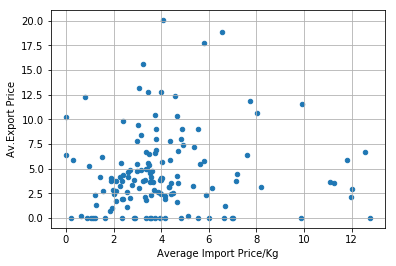

In [40]:
def removeoutliers (outlier):#Function to remove exceptionally high outliers on some export prices
    if outlier <=22:
        return outlier
        return 0
column = net_exports['Average Export Price/Kg']
result= column.apply(removeoutliers)
net_exports['Av.Export Price'] = result
net_exports.plot(x='Average Import Price/Kg',y='Av.Export Price',kind='scatter')

Assuming national stock levels are constant from one year to the next, an estimate of national consumption of honey can be obtained by adding imports to domestic production, and taking away any exports. This is done for the two year period 2015/16, then divided by 2 to get an average for annual consumption. An idea of the level of self-sufficiency in honey production can be estimated by dividing domestic production by the sum of domestic production plus imports minus exports.

In [41]:
netexport_production=merge(honey_time,net_exports,left_index=True,right_index=True,how='outer').fillna(0)
netexport_production['Total Production (ton)']=netexport_production['2015'] + netexport_production['2016']
netexport_production['Average Annual Consumption (ton)']=(netexport_production['Total Production (ton)']+netexport_production['Total Import (ton)']-netexport_production['Total Export (ton)'])/2
netexport_production['% SelfSuffic']=(netexport_production['Total Production (ton)']/(netexport_production['Total Production (ton)']+netexport_production['Total Import (ton)']-netexport_production['Total Export (ton)'])).round(1)
COLUMNS = ['Total Production (ton)','Total Import (ton)','Total Export (ton)','Average Annual Consumption (ton)','% SelfSuffic']
netexport_production= netexport_production[COLUMNS]
netexport_production.sort_values('Average Annual Consumption (ton)').tail(30)

Year                         Total Production (ton)  Total Import (ton)  \
Country                                                                   
Hungary                                     57060.0              3243.1   
Portugal                                    26869.0              9358.1   
Netherlands                                     0.0             30377.7   
Brazil                                      77448.0                58.1   
Central African Republic                    33572.0                 0.0   
Romania                                     49095.0              5838.1   
Australia                                   26294.0             21063.6   
Greece                                      36054.0              5593.6   
Mexico                                     117239.0                 2.6   
India                                      122409.0               727.4   
Angola                                      46924.0               168.1   
Republic of Korea                           48270.0                 0.0   
Italy                                       19339.0             46162.6   
Poland                                      37862.0             44673.1   
Kenya                                       60333.0                 0.0   
United Republic of Tanzania                 60572.0                 0.0   
Canada                                      78561.0             13866.7   
Spain                                       67467.0             58638.7   
France                                      27311.0             68344.1   
Ukraine                                    122909.0                16.6   
Japan                                        5726.0             84666.7   
United Kingdom                              19752.0             83010.5   
Ethiopia                                   106867.0                 4.4   
Russian Federation                         137500.0               308.9   
Iran (Islamic Republic of)                 159514.0                 0.0   
Germany                                     44999.0            169027.4   
Turkey                                     213197.0                 1.1   
United States of America                   144435.0            281890.9   
China                                      967839.0             12284.3   
All                                       3636936.0           1215435.1   

Year                         Total Export (ton)  \
Country                                           
Hungary                                 36375.3   
Portugal                                 9516.7   
Netherlands                              3155.7   
Brazil                                  46409.3   
Central African Republic                    0.0   
Romania                                 21234.3   
Australia                                9700.5   
Greece                                   3665.2   
Mexico                                  71259.2   
India                                   76621.3   
Angola                                      0.0   
Republic of Korea                           0.0   
Italy                                   15526.8   
Poland                                  24228.6   
Kenya                                       0.0   
United Republic of Tanzania                 0.0   
Canada                                  29580.0   
Spain                                   57024.3   
France                                  10192.1   
Ukraine                                 36013.0   
Japan                                      62.0   
United Kingdom                           4533.5   
Ethiopia                                 1169.9   
Russian Federation                       5845.8   
Iran (Islamic Republic of)                  0.0   
Germany                                 51471.4   
Turkey                                  10815.2   
United States of America                 9658.7   
China                                  273085.7   
All               

From the analysis above Argentina (and Nicaragua) has negative consumption. This can only have happened if Argentina was holding large stocks of honey which it released over the 2015/16 period. This was probably the case because Argentinian exports took a nose-dive following punative US import duties in the preceding years. Self -sufficiency is estimated as domestic production divided by domestic consumption. A score over 1 indicates a country produces more honey than it can eat, whereas a score under 1 suggests a country is unable to meet domestic demand from domestic production. The UK seems to be about 20% self-sufficient in honey whereas Spain for example seems to be fully self sufficient.


To estimate consumption per capita population data were downloaded from the World Bank website: http://databank.worldbank.org/data/reports.aspx?source=population-estimates-and-projection

Countries: All
Series: Population, total
Time: 2015
The fie was saved as a csv file: worldpop2015.csv. For political reasons the World bank includes data for Taiwan with China, so the population datum for Taiwan was obtained from Wikipedia and inserted, and the statistic for China was reduced accordingly.

In [42]:
worldpop = read_csv('worldpop2015.csv').dropna()#Read file omitting rows with number not available
COLUMNS = ['Country Name','2015 [YR2015]']#Select the columns required
worldpop = worldpop[COLUMNS]
worldpop = worldpop.rename(columns={'Country Name':'Country','2015 [YR2015]':'Population (2015)'})#Rename column
worldpop['Population (2015)'].astype(int)#Convert string to integer
def changeName(name):#Change names of certain countries to match those of preceding tables
    if name=='Iran, Islamic Rep.':
        return'Iran (Islamic Republic of)'
    elif name=='United States':
        return'United States of America'
    elif name =='Korea, Rep.':
        return'Republic of Korea'
    elif name=='Tanzania':
        return'United Republic of Tanzania'
    elif name=='Vietnam':
        return'Viet Nam'
    elif name=='Czech Republic':
        return'Czechia'
    elif name=='Egypt, Arab Rep.':
        return'Egypt'
    elif name=='Cote d\'Ivoire':
        return'Côte d\'Ivoire'
    elif name=='Moldova':
        return'Republic of Moldova'
    elif name=='Macedonia, FYR':
        return'The former Yugoslav Republic of Macedonia'
    elif name=='Slovak Republic':
        return'Slovakia'
    elif name=='Venezuela, RB':
        return'Venezuela (Bolivarian Republic of)'
    elif name=='Yemen, Rep.':
        return'Yemen'
    elif name=='Kyrgyz Republic':
        return'Kyrgyzstan'
    elif name=='Bolivia':
        return'Bolivia (Plurinational State of)'
    elif name=='West Bank and Gaza':
        return'Occupied Palestinian Territory'
    else:
        return name
worldpop['Country']=worldpop['Country'].apply(changeName)
worldpop.loc[225]=['Taiwan',23550000]#Insert a row for Taiwan that's missing from World bank Data
worldpop.loc[43]=['China',(1.371220e+09-23550000)]#Take the population of Taiwan away from the World Bank value for China
worldpop.head()

Country  Population (2015)
0     Afghanistan         33736494.0
1         Albania          2880703.0
2         Algeria         39871528.0
3  American Samoa            55537.0
4         Andorra            78014.0

These data were then merged with the netexport_production data in order to estimate consumption per capita. The Central African Republic seems to be the biggest honey consumer, producing almost 34,000 tons which is consumed entirely by the domestic market, equal 3.7 kg/capita/p.a.

In [43]:
worldpop.index=worldpop['Country']
consumption_capita=merge(netexport_production,worldpop,left_index=True,right_index=True,how='outer')
consumption_capita['Consumption per capita (Kg)']=(consumption_capita['Average Annual Consumption (ton)'].divide(consumption_capita['Population (2015)'])*1000).round(1)
headings=['Average Annual Consumption (ton)','Population (2015)','Consumption per capita (Kg)']
consumption_capita=consumption_capita[headings]
consumption_capita.sort_values('Average Annual Consumption (ton)',ascending=False).head(30)

Average Annual Consumption (ton)  \
Country                                                         
All                                                1835016.40   
China                                               353518.80   
United States of America                            208333.60   
Turkey                                              101191.45   
Germany                                              81277.50   
Iran (Islamic Republic of)                           79757.00   
Russian Federation                                   65981.55   
Ethiopia                                             52850.75   
United Kingdom                                       49114.50   
Japan                                                45165.35   
Ukraine                                              43456.30   
France                                               42731.50   
Spain                                                34540.70   
Canada                                               31423.85   
United Republic of Tanzania                          30286.00   
Kenya                                                30166.50   
Poland                                               29153.25   
Italy                                                24987.40   
Republic of Korea                                    24135.00   
Angola                                               23546.05   
India                                                23257.55   
Mexico                                               22991.20   
Greece                                               18991.20   
Australia                                            18828.55   
Romania                                              16849.40   
Central African Republic                             16786.00   
Brazil                                               15548.40   
Netherlands                                          13611.00   
Portugal                                             13355.20   
Hungary                                              11963.90   

                             Population (2015)  Consumption per capita (Kg)  
Country                                                                      
All                                        NaN                          NaN  
China                             1.347670e+09                          0.3  
United States of America          3.208966e+08                          0.6  
Turkey                            7.827147e+07                          1.3  
Germany                           8.168661e+07                          1.0  
Iran (Islamic Republic of)        7.936049e+07                          1.0  
Russian Federation                1.440969e+08                          0.5  
Ethiopia                          9.987303e+07                          0.5  
United Kingdom                    6.512886e+07                          0.8  
Japan                             1.271410e+08                          0.4  
Ukraine                           4.515403e+07                          1.0  
France                            6.662407e+07                          0.6  
Spain                             4.644770e+07                          0.7  
Canada                            3.584861e+07                          0.9  
United Republic of Tanzania       5.387996e+07                          0.6  
Kenya                             4.723626e+07                          0.6  
Poland                            3.798641e+07                          0.8  
Italy                             6.073058e+07                          0.4  
Republic of Korea                 5.101495e+07                          0.5  
Angola                            2.785930e+07                          0.8  
India                             1.309054e+09                          0.0  
Mexico                            1.258909e+08                          0.2  
Greece                            1.082088e+07                          1.8 

Rather than labouring with Matplotlib to produce graphical representations of the data, I chose to copy and paste interesting data into a spreadsheet program to generate graphs - it was quicker. Some small data analyses were also done in a spreadsheet (eg. Chinese consumption of honey) because it was simple enough and didn't require the power of Jupyter Notebook.
Geocoding was done by uploading the data into Google Fusion tables and a chlorpleth was create by merging with a polygon data from Arcgis.

As with all data analyses you end up asking more questions than you answer, but that's not a bad thing. For example I was motivated to find out about beekeeping in Greenland as a result of this analysis, and to understand more about the Central African Republic. However, the one area where I've not really had much luck is trying to understand the apparent success of Taiwan as a beekeeing country. I'm still not sure whether Taiwan is the perfect place on earth for bees, or whether their definition of honey is different to ours. 